# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel

len(files_list_train):  5211
len(files_list_val):  571
labels_train.shape: (5211,23)
labels_val.shape: (571,23)
Ground Thruth shape:  (5782, 23)
len(files_list_train):  5210
len(files_list_val):  570
labels_train.shape: (5210,23)
labels_val.shape: (570,23)
Ground Thruth shape:  (5780, 23)
len(files_list_train):  5210
len(files_list_val):  570
labels_train.shape: (5210,23)
labels_val.shape: (570,23)
Ground Thruth shape:  (5780, 23)
len(files_list_train):  5211
len(files_list_val):  571
labels_train.shape: (5211,23)
labels_val.shape: (571,23)
Ground Thruth shape:  (5782, 23)
len(files_list_train):  3990
labels_train.shape: (3990, 1)
Ground Thruth shape:  (3990, 1)


# Start Network Trainer

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_mobilenetv2',
        'description': 'Experimenting run with GENKI GT data',
        'tags': ['mobilenetv2', 'ground truth', 'genki'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': [DLName.FVC_PYBOSSA],
        'req': cts.ICAO_REQ.MOUTH,
        'aligned': True,
        'use_gt_data': True,
        'gt_names': [GTName.GENKI]
    },
    'net_train_params': {
        'base_model': BaseModel.MOBILENET_V2,
        'batch_size': 64,
        'n_epochs': 30,
        'early_stopping': 30,
        'shuffle': True,
        'dense_units': 128,
        'learning_rate': 1e-5,
        'optimizer': 'Adam',
        'dropout': 0.25,
        'train_prop': 0.7,
        'validation_prop': 0.15,
        'test_prop': 0.15,
        'seed': 42,
        'validation_split': 0.15
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Experimenting run with GENKI GT data',
                'name': 'train_mobilenetv2',
                'src_files': ['net_trainer.py'],
                'tags': ['mobilenetv2', 'ground truth', 'genki']},
 'net_train_params': {'base_model': <BaseModel.MOBILENET_V2: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f019260ff70>}>,
                      'batch_size': 64,
                      'dense_units': 128,
                      'dropout': 0.25,
                      'early_stopping': 30,
                      'learning_rate': 1e-05,
                      'n_epochs': 30,
                      'optimizer': 'Adam',
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.15,
                      'train_prop': 0.7,
                      'validation_prop': 0.15,
                      'validation_split': 0.15},
 'properties': {'aligned': True,

# Load Data

In [4]:
trainer.load_training_data()

Loading data
Input data.shape: (3990, 4)
Number of Samples: 3990
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Balancing input dataset..
df_comp.shape: (1832, 4), df_non_comp.shape: (2158, 4)
final_df.shape:  (3990, 4)
n_comp:  1832
n_non_comp:  2158
Input dataset balanced


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 2884 validated image filenames.
Found 508 validated image filenames.
Found 598 validated image filenames.
TOTAL: 3990


# Use Neptune

In [7]:
trainer.start_neptune()
trainer.create_experiment()

Starting Neptune
Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-65


# Training Model

In [8]:
trainer.train_model()

Training MOBILENET_V2 network
Epoch 1/30
45/45 [==============================] - 8s 175ms/step - loss: 0.7168 - accuracy: 0.5216 - val_loss: 0.6932 - val_accuracy: 0.5179
Epoch 2/30
45/45 [==============================] - 6s 131ms/step - loss: 0.7122 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.5067
Epoch 3/30
45/45 [==============================] - 6s 131ms/step - loss: 0.7076 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4933
Epoch 4/30
45/45 [==============================] - 6s 131ms/step - loss: 0.7054 - accuracy: 0.4936 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/30
45/45 [==============================] - 6s 133ms/step - loss: 0.7033 - accuracy: 0.4993 - val_loss: 0.6934 - val_accuracy: 0.4821
Epoch 6/30
45/45 [==============================] - 6s 133ms/step - loss: 0.7027 - accuracy: 0.5057 - val_loss: 0.6935 - val_accuracy: 0.4978
Epoch 7/30
45/45 [==============================] - 6s 133ms/step - loss: 0.7026 - accuracy: 0.5138 - val_loss: 0.6935

# Plots

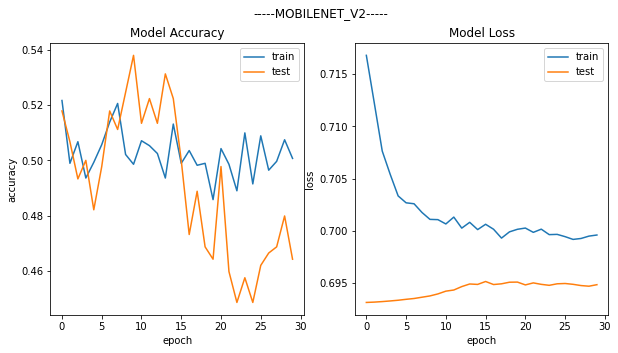

In [9]:
trainer.draw_training_history()

# Saving Trained Model

# Test Trained Model

In [10]:
trainer.test_model()

Testing Trained Model
              precision    recall  f1-score   support

    NON_COMP       0.53      0.48      0.51       325
        COMP       0.44      0.49      0.47       273

    accuracy                           0.49       598
   macro avg       0.49      0.49      0.49       598
weighted avg       0.49      0.49      0.49       598

Model Accuracy: 0.4866


# Evaluate Model

In [11]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.6947
TEST accuracy:  0.4933


# Vizualize Model Classification

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


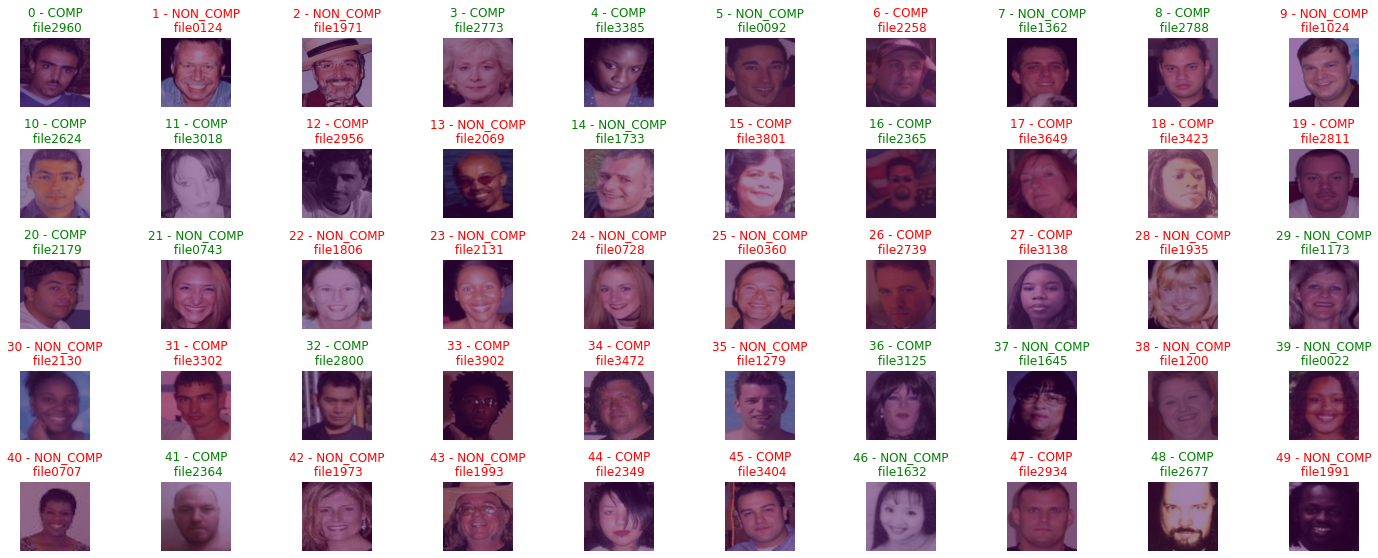

In [12]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [13]:
trainer.finish_experiment()

Finishing Neptune
